In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math

# Estimating number of mafia needed

Below is edited code from https://www.alexirpan.com/2015/08/25/perfectly-intelligent-mafia.html to find the number of mafia needed in a given mafia game of n players so that the probability of winning of both parties is 50-50.


In [ ]:
# import random

# def simulate_game(n, m):
#     # Simulate a game with n players, m mafia
#     while n > 2 * m:
#         # Lynch random player
#         if random.randint(0, n - 1) < m:
#             m -= 1
#         if m == 0:
#             return False  # Town wins
#         # Mafia kills one townsperson
#         n -= 2
#     return True  # Mafia wins

# def get_win_odds(n, m, trials=10000):
#     return sum(simulate_game(n, m) for _ in range(trials)) / trials

# def find_5050(n):
#     threshold = 0.02
#     low = 1 #minimum number of mafia
#     high = n #maximum number of mafia
#     while low < high: #binary search
#         mid = (low + high) // 2
#         per = get_win_odds(n, mid)
#         #print(f'N={n}, low={low}, high={high}, mid={mid}, win chance={per:.3f}')
#         if abs(per - 0.5) < threshold: #if per is around 0.48-0.52% => will be considered 50 50
#             return mid
#         elif per < 0.5:
#             low = mid + 1
#         else:
#             high = mid
#     return low

# list_of_mafia = []
# # Run for N = 7 to 15
# for N in range(7, 100):
#     #print(f'\nGroup size N = {N}')
#     mafia_needed = find_5050(N)
#     list_of_mafia.append((N, mafia_needed))



In [ ]:
# import matplotlib.pyplot as plt

# # Unzip the list into two separate lists
# n_vals, mafia_vals = zip(*list_of_mafia)

# # Plot
# plt.figure(figsize=(8, 6))
# plt.plot(n_vals, mafia_vals, marker='o', linestyle='-')
# plt.ylabel('Number of Mafia Needed for ~50% Win Rate')
# plt.xlabel('Total Number of Players')
# plt.title('Minimum Mafia Needed vs Group Size (Uniform Random Kill)')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
import random

def mafia_game_simulation(n, m, max_steps=100):
    players = {i: 'Mafia' if i < m else 'Town' for i in range(n)}
    alive = set(players.keys())

    t = 0
    while True:
        mafia_alive = [p for p in alive if players[p] == 'Mafia']
        town_alive = [p for p in alive if players[p] == 'Town']

        if len(mafia_alive) == 0:
            return False  # Town wins
        if len(mafia_alive) >= len(town_alive):
            return True  # Mafia wins

        if t % 2 == 0:
            # Night: Mafia kills Town
            if town_alive:
                victim = random.choice(town_alive)
                alive.remove(victim)
        else:
            # Day: Random player lynched
            victim = random.choice(list(alive))
            alive.remove(victim)

        t += 1
        if t > max_steps:
            break

    return None

def estimate_mafia_win_prob(n, m, n_simulations=50000):
    wins = sum(mafia_game_simulation(n, m) for _ in range(n_simulations))
    return wins / n_simulations

# Iterates through all possible n's, finds the number of mafias needed for p(mafia wins) = 0.5 by simulating each n 50,000 times
def find_5050_realistic(n, threshold=0.02):
    low = 1
    high = n
    while low < high:
        mid = (low + high) // 2
        win_rate = estimate_mafia_win_prob(n, mid)
        #print(f'N={n}, low={low}, high={high}, mid={mid}, mafia win rate={win_rate:.3f}')
        if abs(win_rate - 0.5) < threshold:
            return mid
        elif win_rate < 0.5:
            low = mid + 1
        else:
            high = mid
    return low

list_of_mafia = []

# Assuming that a small group of friends is between 7 to 25 people, what is the n needed so that p(mafia wins) = 0.5
for n in range(7, 25):
    mafia_needed = find_5050_realistic(n)
    list_of_mafia.append((n, mafia_needed))

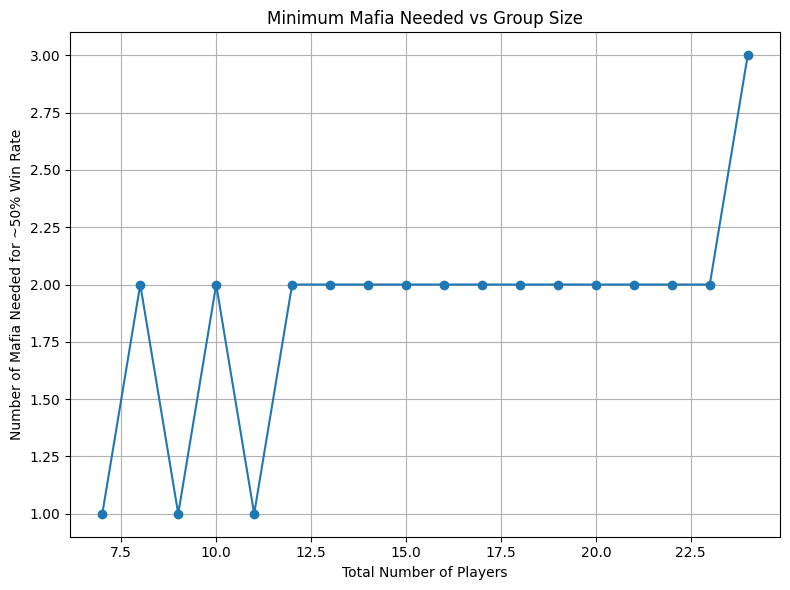

In [ ]:
# Untuple
n_vals, mafia_vals = zip(*list_of_mafia)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(n_vals, mafia_vals, marker='o', linestyle='-')
plt.ylabel('Number of Mafia Needed for ~50% Win Rate')
plt.xlabel('Total Number of Players')
plt.title('Minimum Mafia Needed vs Group Size')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(list_of_mafia[:10])

[(7, 1), (8, 2), (9, 1), (10, 2), (11, 1), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2)]


# Base Model

In [ ]:
def mafia_game_simulation(n, m, max_steps=100):
    # n = total players
    # m = number of mafia
    # max_steps = maximum number of night/day cycles to avoid infinite loop

    # Initialize players: assign each player an ID and a role (mafia or townsperson)
    players = {i: 'Mafia' if i < m else 'Town' for i in range(n)}
    alive = set(players.keys())

    t = 0  # time step
    while True:
        # Check win conditions
        mafia_alive = [p for p in alive if players[p] == 'Mafia']
        town_alive = [p for p in alive if players[p] == 'Town']

        if len(mafia_alive) == 0:
            return False  # Town wins
        if len(mafia_alive) >= len(town_alive):
            return True  # Mafia wins

        if t % 2 == 0:
            # Night: Mafia kills a random Town player
            if town_alive:
                victim = random.choice(town_alive)
                alive.remove(victim)
        else:
            # Day: Random player is lynched (could be Mafia or Town)
            victim = random.choice(list(alive))
            alive.remove(victim)

        t += 1
        if t > max_steps:
            break  # just in case

    return None  # if max steps reached

def estimate_mafia_win_prob(n, m, n_simulations=10000):
    wins = sum(mafia_game_simulation(n, m) for _ in range(n_simulations))
    return wins / n_simulations

# Model 1


In [ ]:
num_red_edges = 5

In [ ]:
def mafia_game_simulation_fixed_red_updated(n, m, num_red_edges, max_steps=100, red_bias_weight=2.0):
    players = {i: 'Mafia' if i < m else 'Town' for i in range(n)}
    alive = set(players.keys())

    # Build red edge graph
    G = nx.Graph()
    G.add_nodes_from(range(n))

    possible_pairs = [(i, j) for i in range(n) for j in range(i+1, n)]
    red_edges = random.sample(possible_pairs, num_red_edges)
    G.add_edges_from(red_edges)

    t = 0
    while True:
        mafia_alive = [p for p in alive if players[p] == 'Mafia']
        town_alive = [p for p in alive if players[p] == 'Town']

        if len(mafia_alive) == 0:
            return False  # Town wins
        if len(mafia_alive) >= len(town_alive):
            return True  # Mafia wins

        if t % 2 == 0:
            # Night: Mafia kills biased Town
            if town_alive:
                town_list = list(town_alive)
                # Calculate night kill weights
                night_weights = []
                for town in town_list:
                    has_enemy = any((G.has_edge(town, mafia) and mafia in alive) for mafia in mafia_alive)
                    weight = red_bias_weight if has_enemy else 1.0
                    night_weights.append(weight)

                # Normalize weights and pick
                total_weight = sum(night_weights)
                night_probs = [w / total_weight for w in night_weights]

                victim = random.choices(town_list, weights=night_probs, k=1)[0]
                alive.remove(victim)
        else:
            # Day: Biased lynch based on red edges
            alive_list = list(alive)

            # Calculate lynch weights
            lynch_weights = []
            for node in alive_list:
                neighbors = list(G.neighbors(node))
                has_enemy = any(neighbor in alive for neighbor in neighbors)
                weight = red_bias_weight if has_enemy else 1.0
                lynch_weights.append(weight)

            total_weight = sum(lynch_weights)
            lynch_probs = [w / total_weight for w in lynch_weights]

            victim = random.choices(alive_list, weights=lynch_probs, k=1)[0]
            alive.remove(victim)

        t += 1
        if t > max_steps:
            break

    return None

def estimate_mafia_win_prob_fixed_red_updated(n, m, num_red_edges, n_simulations=5000):
    wins = sum(mafia_game_simulation_fixed_red_updated(n, m, num_red_edges) for _ in range(n_simulations))
    return wins / n_simulations

# Model 2

In [ ]:
num_green_edges = 5

In [ ]:
def mafia_game_simulation_fixed_green(n, m, num_green_edges, max_steps=100, green_bias_weight=0.5):
    players = {i: 'Mafia' if i < m else 'Town' for i in range(n)}
    alive = set(players.keys())

    # Build green edge graph
    G = nx.Graph()
    G.add_nodes_from(range(n))

    possible_pairs = [(i, j) for i in range(n) for j in range(i+1, n)]
    green_edges = random.sample(possible_pairs, num_green_edges)
    G.add_edges_from(green_edges)

    t = 0
    while True:
        mafia_alive = [p for p in alive if players[p] == 'Mafia']
        town_alive = [p for p in alive if players[p] == 'Town']

        if len(mafia_alive) == 0:
            return False  # Town wins
        if len(mafia_alive) >= len(town_alive):
            return True  # Mafia wins

        if t % 2 == 0:
            # Night: Mafia kills Town (less likely to kill friends)
            if town_alive:
                town_list = list(town_alive)
                night_weights = []
                for town in town_list:
                    has_friend = any((G.has_edge(town, mafia) and mafia in alive) for mafia in mafia_alive)
                    weight = green_bias_weight if has_friend else 1.0
                    night_weights.append(weight)

                total_weight = sum(night_weights)
                night_probs = [w / total_weight for w in night_weights]

                victim = random.choices(town_list, weights=night_probs, k=1)[0]
                alive.remove(victim)
        else:
            # Day: Biased lynch - less likely to lynch friends
            alive_list = list(alive)

            lynch_weights = []
            for node in alive_list:
                has_friend = any((G.has_edge(node, neighbor) and neighbor in alive) for neighbor in G.neighbors(node))
                weight = green_bias_weight if has_friend else 1.0
                lynch_weights.append(weight)

            total_weight = sum(lynch_weights)
            lynch_probs = [w / total_weight for w in lynch_weights]

            victim = random.choices(alive_list, weights=lynch_probs, k=1)[0]
            alive.remove(victim)

        t += 1
        if t > max_steps:
            break

    return None

def estimate_mafia_win_prob_fixed_green(n, m, num_green_edges, n_simulations=5000):
    wins = sum(mafia_game_simulation_fixed_green(n, m, num_green_edges) for _ in range(n_simulations))
    return wins / n_simulations

# Ultimate model

In [65]:
def mafia_game_simulation_red_green(n, m, num_red_edges, num_green_edges, max_steps=100, red_bias_weight=2.0,green_bias_weight=0.5):
    players = {i: 'Mafia' if i < m else 'Town' for i in range(n)}
    alive = set(players.keys())

    # Build red and green edge graphs
    red_G = nx.Graph()
    green_G = nx.Graph()
    red_G.add_nodes_from(range(n))
    green_G.add_nodes_from(range(n))

    # Create possible unique pairs
    possible_pairs = [(i, j) for i in range(n) for j in range(i+1, n)]
    sampled_pairs = random.sample(possible_pairs, num_red_edges + num_green_edges)

    red_edges = sampled_pairs[:num_red_edges]
    green_edges = sampled_pairs[num_red_edges:]

    red_G.add_edges_from(red_edges)
    green_G.add_edges_from(green_edges)
    print("Red edges:" ,red_edges)
    print("Green edges:" ,green_edges)

    t = 0
    while True:
        mafia_alive = [p for p in alive if players[p] == 'Mafia']
        town_alive = [p for p in alive if players[p] == 'Town']

        if len(mafia_alive) == 0:
            return False  # Town wins
        if len(mafia_alive) >= len(town_alive):
            return True  # Mafia wins

        if t % 2 == 0:
            # Night: Mafia kills Town
            if town_alive:
                town_list = list(town_alive)
                night_weights = []
                for town in town_list:
                    # Check red and green connections with alive Mafia
                    num_enemy = sum((red_G.has_edge(town, mafia) and mafia in alive) for mafia in mafia_alive)
                    num_friend = sum((green_G.has_edge(town, mafia) and mafia in alive) for mafia in mafia_alive)

                    weight = 1.0
                    #weight of getting killed is proportional to the number of enemies and vice versa for friends
                    if num_enemy > 0:
                        weight = (weight) * red_bias_weight**num_enemy
                    if num_friend > 0:
                        weight = (weight) * (green_bias_weight**num_friend)
                    night_weights.append(weight)
                total_weight = sum(night_weights)
                night_probs = [w / total_weight for w in night_weights]
                victim = random.choices(town_list, weights=night_probs, k=1)[0]
                alive.remove(victim)
        else:
            # Day: Lynch based on red and green biases
            alive_list = list(alive)
            lynch_weights = []
            node_friend = []
            node_enemy = []
            for node in alive_list:
                num_enemy = sum((red_G.has_edge(node, neighbor) and neighbor in alive) for neighbor in red_G.neighbors(node))
                num_friend = sum((green_G.has_edge(node, neighbor) and neighbor in alive) for neighbor in green_G.neighbors(node))
                weight = 1.0
                    #weight of getting lynched is proportional to the number of enemies and vice versa for friends
                if num_enemy > 0:
                    weight = (weight) * red_bias_weight**num_enemy
                if num_friend > 0:
                    weight = (weight) * (green_bias_weight**num_friend)
                lynch_weights.append(weight)
                node_friend.append(num_friend)
                node_enemy.append(num_enemy)
            total_weight = sum(lynch_weights)
            print("Night weight: ",lynch_weights)
            lynch_probs = [w / total_weight for w in lynch_weights]
            victim = random.choices(alive_list, weights=lynch_probs, k=1)[0]
            alive.remove(victim)
            print("Node Friend", node_friend)
            print("Node Enemy", node_enemy)
        t += 1
        if t > max_steps:
            break
    return None

def estimate_mafia_win_prob_red_green(n, m, num_red_edges, num_green_edges, n_simulations=1):
    wins = sum(mafia_game_simulation_red_green(n, m, num_red_edges, num_green_edges) for _ in range(n_simulations))
    return wins / n_simulations



In [67]:
estimate_mafia_win_prob_red_green(22,2,3,15,1)

Red edges: [(8, 10), (0, 15), (1, 2)]
Green edges: [(12, 21), (1, 12), (2, 13), (1, 20), (12, 18), (7, 20), (5, 13), (16, 20), (7, 10), (12, 15), (4, 7), (10, 11), (12, 19), (18, 21), (4, 19)]
Night weight:  [2.0, 0.5, 1.0, 1.0, 0.25, 0.5, 1.0, 0.125, 2.0, 1.0, 0.5, 0.5, 0.03125, 0.25, 1.0, 1.0, 1.0, 0.25, 0.25, 0.25, 0.25]
Node Friend [0, 2, 1, 0, 2, 1, 0, 3, 0, 0, 2, 1, 5, 2, 0, 1, 0, 2, 2, 2, 2]
Node Enemy [1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Night weight:  [2.0, 0.5, 1.0, 1.0, 0.5, 0.5, 1.0, 2.0, 1.0, 0.5, 0.03125, 0.25, 1.0, 1.0, 1.0, 0.25, 0.25, 0.5, 0.25]
Node Friend [0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 5, 2, 0, 1, 0, 2, 2, 1, 2]
Node Enemy [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Night weight:  [2.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 2.0, 1.0, 0.5, 0.0625, 0.25, 1.0, 1.0, 0.25, 0.5, 0.25]
Node Friend [0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 4, 2, 0, 1, 2, 1, 2]
Node Enemy [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]
Night weight:  [1.0, 0.5, 1.0, 

0.0

In [15]:

def mafia_game_simulation_red_green_plot(n, m, num_red_edges, num_green_edges, max_steps=100, red_bias_weight=2.0, green_bias_weight=0.5):
    players = {i: 'Mafia' if i < m else 'Town' for i in range(n)}
    alive = set(players.keys())

    # Build red and green edge graphs
    red_G = nx.Graph()
    green_G = nx.Graph()
    red_G.add_nodes_from(range(n))
    green_G.add_nodes_from(range(n))

    possible_pairs = [(i, j) for i in range(n) for j in range(i+1, n)]
    sampled_pairs = random.sample(possible_pairs, num_red_edges + num_green_edges)

    red_edges = sampled_pairs[:num_red_edges]
    green_edges = sampled_pairs[num_red_edges:]

    red_G.add_edges_from(red_edges)
    green_G.add_edges_from(green_edges)

    # Combined graph for visualization
    full_G = nx.Graph()
    full_G.add_nodes_from(range(n))
    full_G.add_edges_from(red_edges)
    full_G.add_edges_from(green_edges)

    # Fixed layout for consistent position
    pos = nx.spring_layout(full_G, seed=42)

    t = 0
    while True:
        mafia_alive = [p for p in alive if players[p] == 'Mafia']
        town_alive = [p for p in alive if players[p] == 'Town']

        if len(mafia_alive) == 0:
            print(f'\nGame ended at t={t}: Town wins!\n')
            break
        if len(mafia_alive) >= len(town_alive):
            print(f'\nGame ended at t={t}: Mafia wins!\n')
            break

        plot_current_state(full_G, alive, players, red_edges, green_edges, pos, t)

        if t % 2 == 0:
            # Mafia's move (even t)
            if town_alive:
                town_list = list(town_alive)
                night_weights = []
                for town in town_list:
                    has_enemy = any((red_G.has_edge(town, mafia) and mafia in alive) for mafia in mafia_alive)
                    has_friend = any((green_G.has_edge(town, mafia) and mafia in alive) for mafia in mafia_alive)
                    weight = 1.0
                    if has_enemy:
                        weight *= red_bias_weight
                    if has_friend:
                        weight *= green_bias_weight
                    night_weights.append(weight)

                total_weight = sum(night_weights)
                night_probs = [w / total_weight for w in night_weights]

                victim = random.choices(town_list, weights=night_probs, k=1)[0]
                alive.remove(victim)
                print(f'Night {t//2 + 1}: Mafia killed player {victim}')
        else:
            # Town's move (odd t)
            alive_list = list(alive)
            lynch_weights = []
            for node in alive_list:
                has_enemy = any((red_G.has_edge(node, neighbor) and neighbor in alive) for neighbor in red_G.neighbors(node))
                has_friend = any((green_G.has_edge(node, neighbor) and neighbor in alive) for neighbor in green_G.neighbors(node))
                weight = 1.0
                if has_enemy:
                    weight *= red_bias_weight
                if has_friend:
                    weight *= green_bias_weight
                lynch_weights.append(weight)

            total_weight = sum(lynch_weights)
            lynch_probs = [w / total_weight for w in lynch_weights]

            victim = random.choices(alive_list, weights=lynch_probs, k=1)[0]
            alive.remove(victim)
            print(f'Day {t//2 + 1}: Town lynched player {victim}')

        t += 1

        if t > max_steps:
            print(f'\nGame ended at t={t}: Max steps reached\n')
            break

    return None

def plot_current_state(G, alive, players, red_edges, green_edges, pos, t):
    plt.figure(figsize=(8, 6))

    node_colors = []
    for node in G.nodes():
        if node in alive:
            if players[node] == 'Mafia':
                node_colors.append('red')
            else:
                node_colors.append('blue')
        else:
            node_colors.append('gray')  # Dead players are gray

    # Draw green and red edges between alive players only
    green_edges_alive = [(u, v) for u, v in green_edges if u in alive and v in alive]
    red_edges_alive = [(u, v) for u, v in red_edges if u in alive and v in alive]

    nx.draw_networkx_edges(G, pos, edgelist=green_edges_alive, edge_color='green', style='solid')
    nx.draw_networkx_edges(G, pos, edgelist=red_edges_alive, edge_color='red', style='dashed')

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)

    labels = {node: str(node) for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels, font_color='white')

    # ==== NEW part: Better title ====
    if t == 0:
        phase = "Night 1"
    elif t % 2 == 0:
        phase = f"Night {t//2 + 1}"  # Even t (after t=0) = night
    else:
        phase = f"Day {(t+1)//2}"  # Odd t = day

    plt.title(f'Time Step {t} — {phase}', fontsize=16)
    plt.axis('off')
    plt.show()


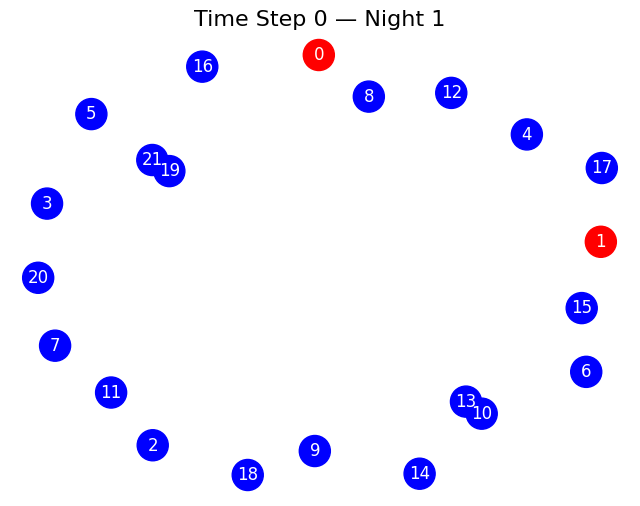

Night 1: Mafia killed player 14


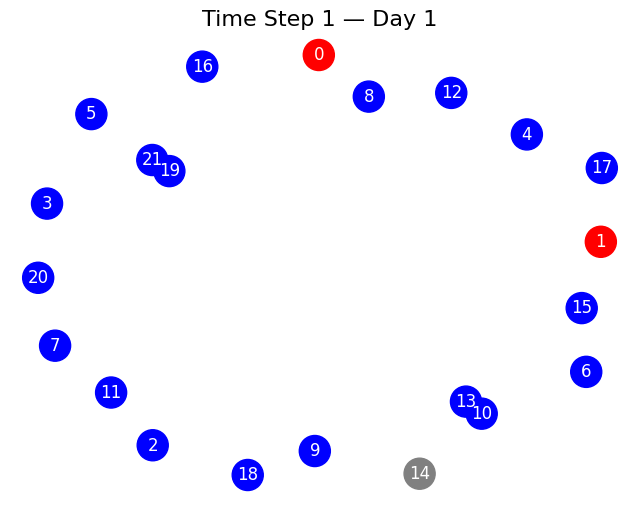

Day 1: Town lynched player 21


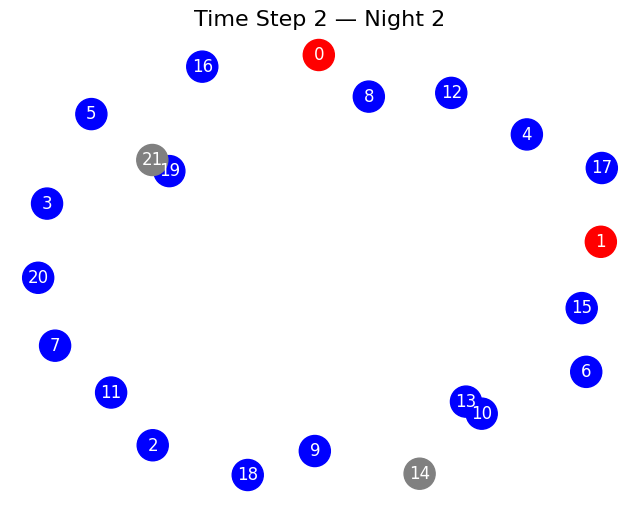

Night 2: Mafia killed player 19


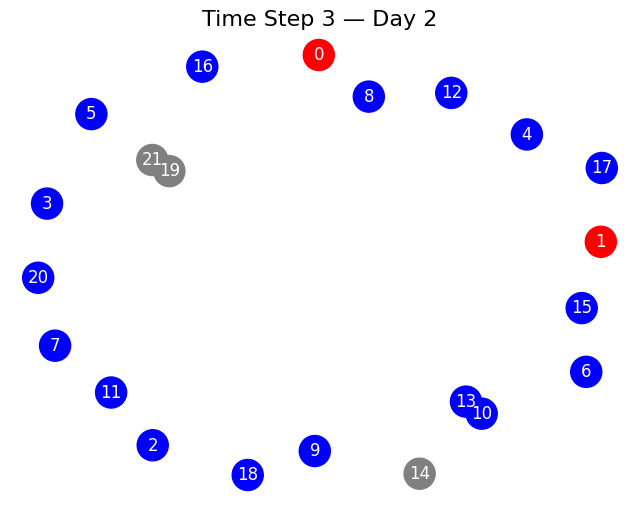

Day 2: Town lynched player 7


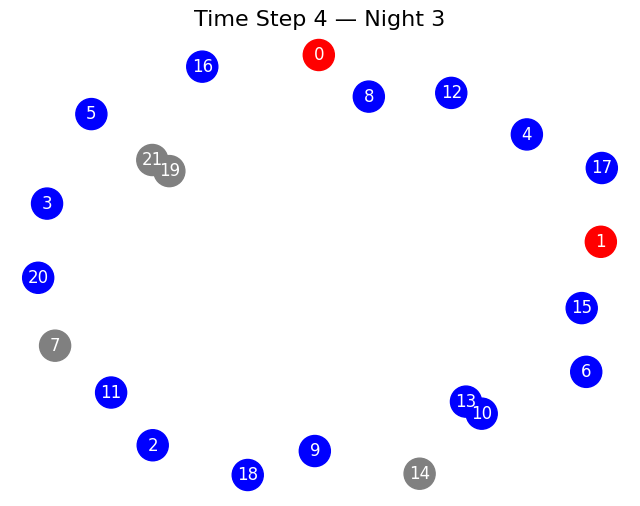

Night 3: Mafia killed player 10


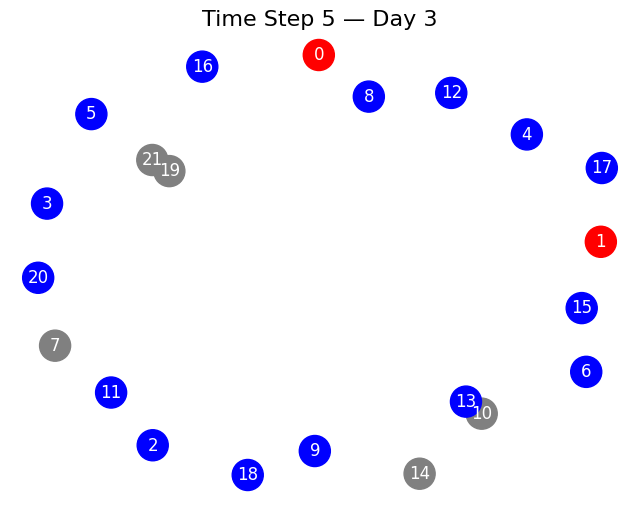

Day 3: Town lynched player 15


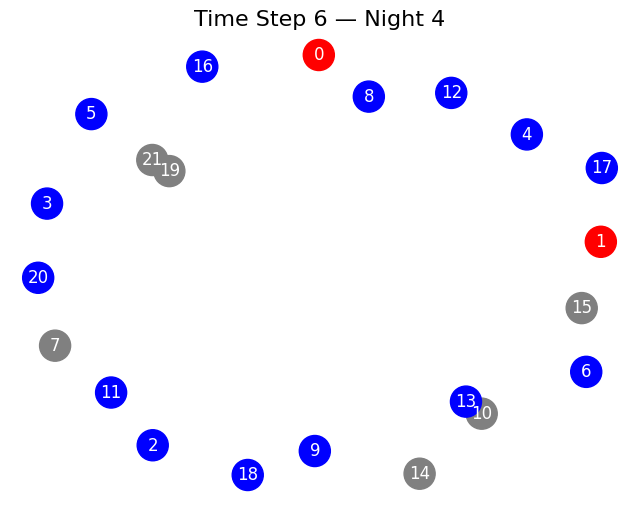

Night 4: Mafia killed player 13


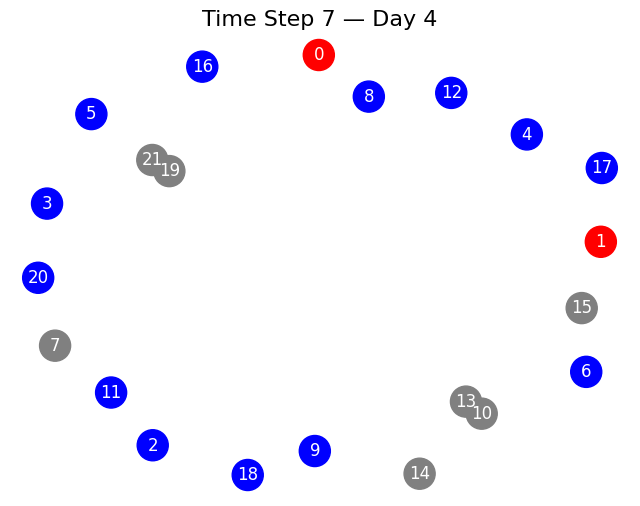

Day 4: Town lynched player 5


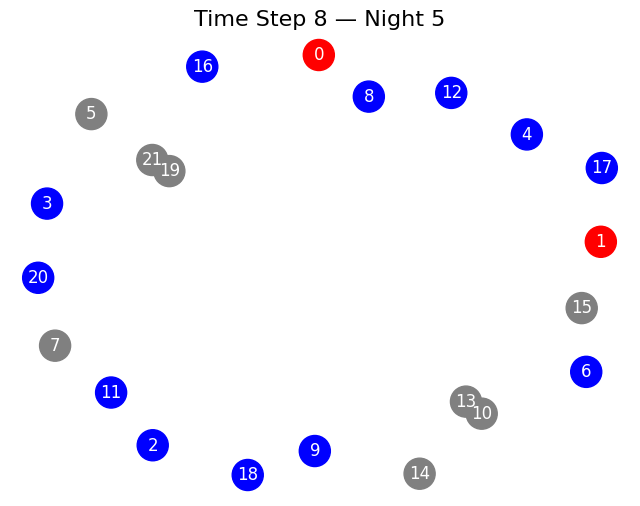

Night 5: Mafia killed player 9


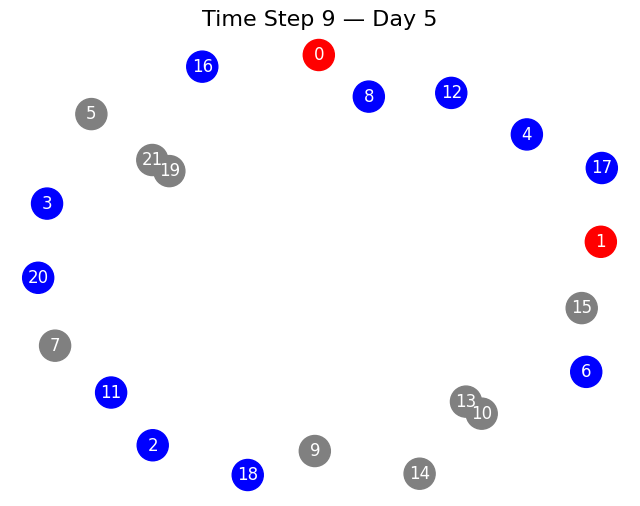

Day 5: Town lynched player 17


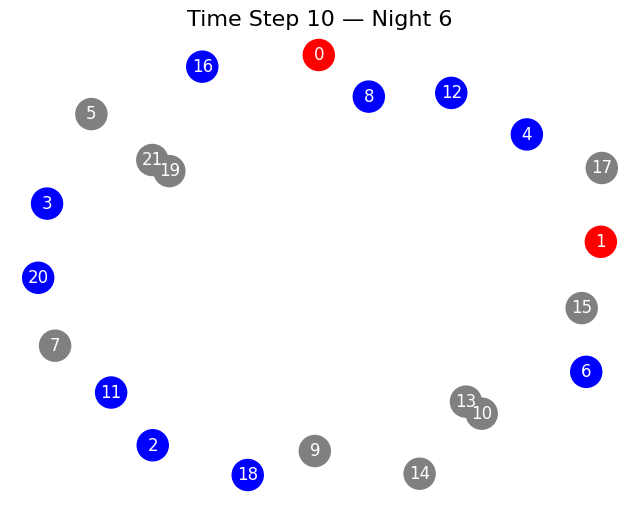

Night 6: Mafia killed player 20


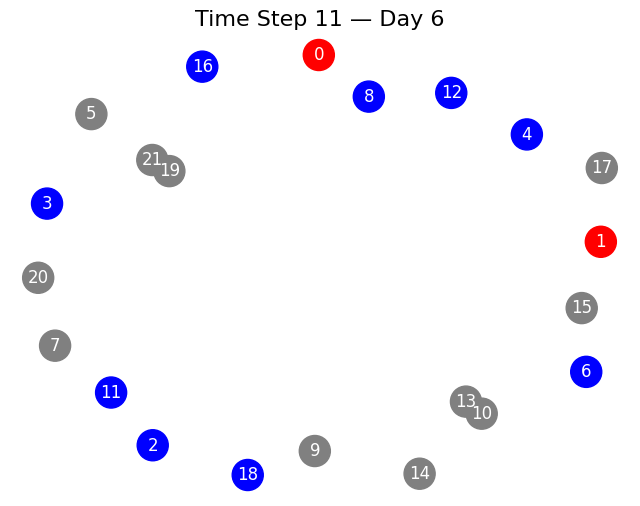

Day 6: Town lynched player 3


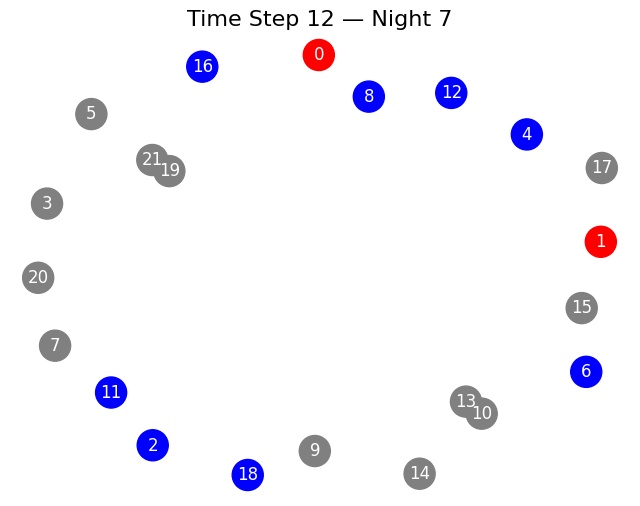

Night 7: Mafia killed player 16


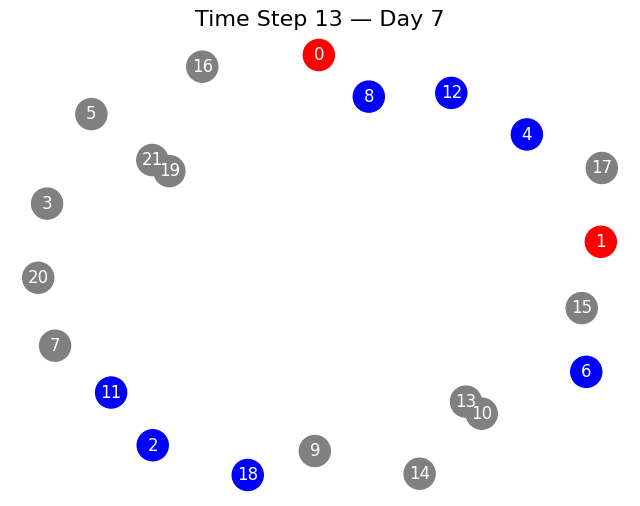

Day 7: Town lynched player 2


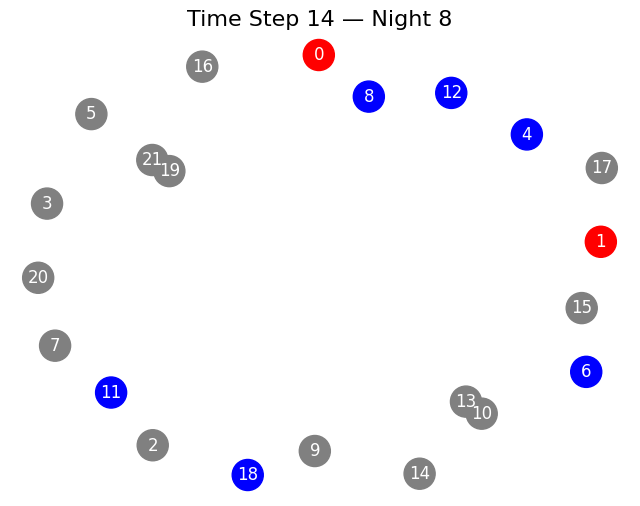

Night 8: Mafia killed player 6


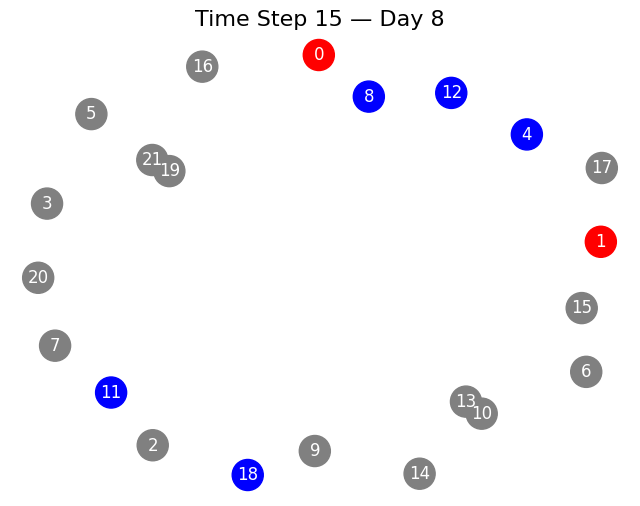

Day 8: Town lynched player 1


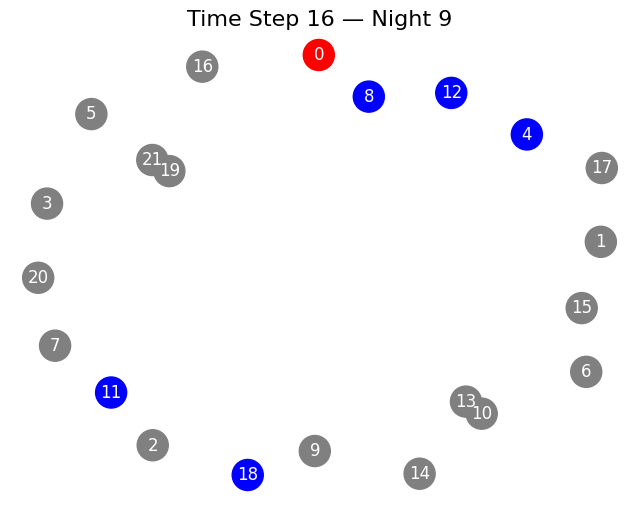

Night 9: Mafia killed player 18


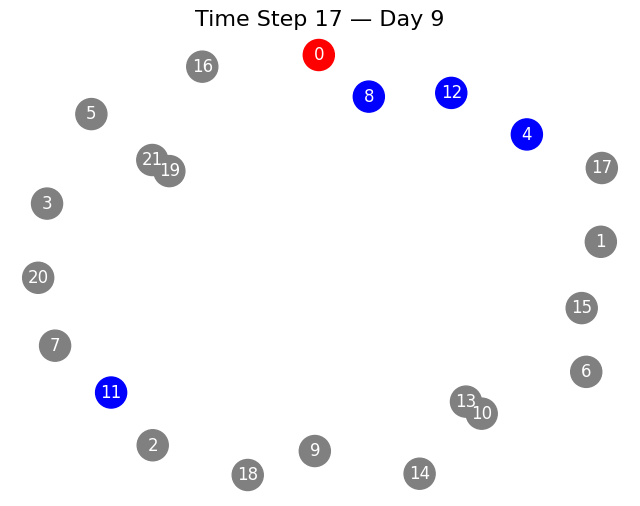

Day 9: Town lynched player 8


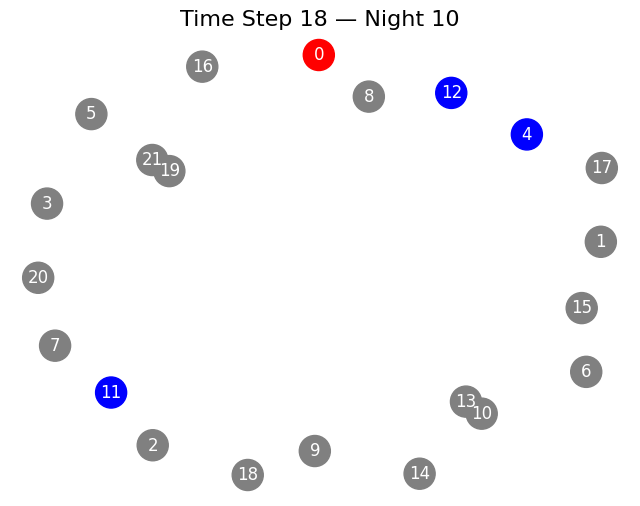

Night 10: Mafia killed player 4


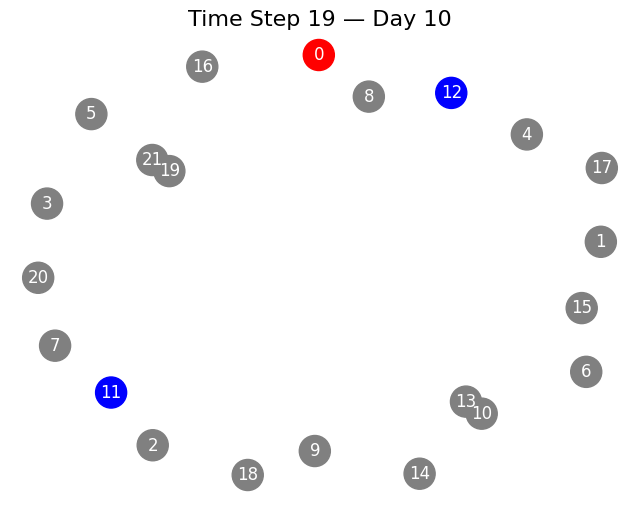

Day 10: Town lynched player 11

Game ended at t=20: Mafia wins!



In [18]:
mafia_game_simulation_red_green_plot(22,2,1,1)

# Compare

In [ ]:
#Initial Condition
n = 22  # total players
m = 2 # number of mafia
n_simulations = 50000

num_red_edges = 30
num_green_edges = 30

In [ ]:
win_rate = estimate_mafia_win_prob(n, m, n_simulations)
print(f'Estimated Mafia win rate with {m} mafia in {n} players and no relationships: {win_rate:.3f}')

Estimated Mafia win rate with 2 mafia in 22 players and no relationships: 0.495


In [ ]:
win_rate_fixed_red_updated = estimate_mafia_win_prob_fixed_red_updated(n, m, num_red_edges, n_simulations)
print(f'Estimated Mafia win rate with {num_red_edges} red edges (n={n}, m={m}): {win_rate_fixed_red_updated:.3f}')

Estimated Mafia win rate with 30 red edges (n=22, m=2): 0.512


In [ ]:
win_rate_fixed_green = estimate_mafia_win_prob_fixed_green(n, m, num_green_edges, n_simulations)
print(f'Estimated Mafia win rate with {num_green_edges} green edges (n={n}, m={m}): {win_rate_fixed_green:.3f}')

Estimated Mafia win rate with 30 green edges (n=22, m=2): 0.517


In [ ]:
win_rate_red_green = estimate_mafia_win_prob_red_green(n, m, num_red_edges, num_green_edges, n_simulations)
print(f'Estimated Mafia win rate with {num_red_edges} red edges and {num_green_edges} green edges (n={n}, m={m}): {win_rate_red_green:.3f}')

Estimated Mafia win rate with 30 red edges and 30 green edges (n=22, m=2): 0.538


# Non-Dimensionalization

Assuming complete graph, change proportion of Red and Green edge. Fix n = 22, m = 2

In [ ]:
def estimate_mafia_win_prob_red_green_red_green_proportion_experiment(n, m, num_red_edges, num_green_edges, n_simulations=5000):
    wins = sum(mafia_game_simulation_red_green(n, m, num_red_edges, num_green_edges) for _ in range(n_simulations))
    return wins / n_simulations

def red_green_proportion_experiment(n, m, max_steps=100, red_bias_weight=2.0, green_bias_weight=0.5, step=0.01):
    total_edges = n*(n - 1)//2
    proportions = np.arange(step, 1.0 + step, step)
    win_rates = []

    for red_prop in proportions:
        num_red_edges = int(red_prop * total_edges)
        num_green_edges = total_edges - num_red_edges
        win_rate = estimate_mafia_win_prob_red_green_red_green_proportion_experiment(
            n=n,
            m=m,
            num_red_edges=num_red_edges,
            num_green_edges=num_green_edges,
            n_simulations=1000
        )

        win_rates.append(win_rate)

    plt.plot(proportions, win_rates, marker='o')
    plt.xlabel("Proportion of Red Edges")
    plt.ylabel("Mafia Win Rate")
    plt.title("Mafia Win Rate vs. Proportion of Red Edges")
    plt.grid(True)
    plt.show()

red_green_proportion_experiment(22, 2, max_steps=100, red_bias_weight=2.0, green_bias_weight=0.5, step=0.01)

KeyboardInterrupt: 

Fix proportion of red and green at 1 green,1 red, fix n = 22, change weight



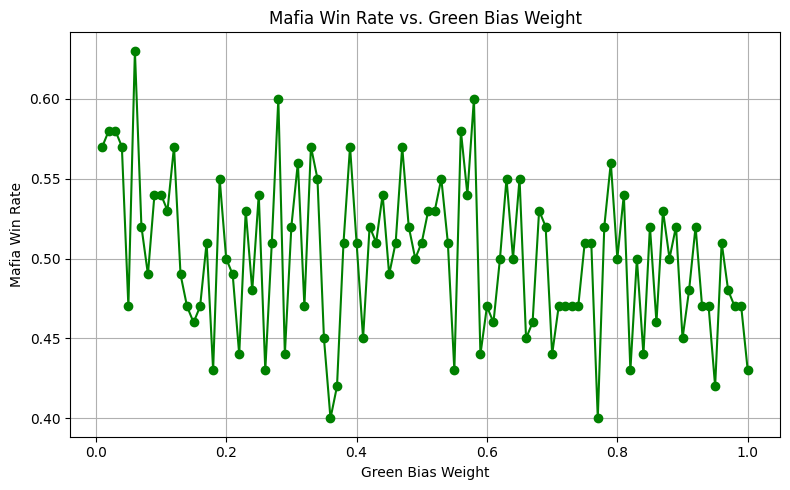

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.  ]
[0.57, 0.58, 0.58, 0.57, 0.47, 0.63, 0.52, 0.49, 0.54, 0.54, 0.53, 0.57, 0.49, 0.47, 0.46, 0.47, 0.51, 0.43, 0.55, 0.5, 0.49, 0.44, 0.53, 0.48, 0.54, 0.43, 0.51, 0.6, 0.44, 0.52, 0.56, 0.47, 0.57, 0.55, 0.45, 0.4, 0.42, 0.51, 0.57, 0.51, 0.45, 0.52, 0.51, 0.54, 0.49, 0.51, 0.57, 0.52, 0.5, 0.51, 0.53, 0.53, 0.55, 0.51, 0.43, 0.58, 0.54, 0.6, 0.44, 0.47, 0.46, 0.5, 0.55, 0.5, 0.55, 0.45, 0.46, 0.53, 0.52, 0.44, 0.47, 0.47, 0.47, 0.47, 0.51, 0.51, 0.4, 0.52, 0.56, 0.5, 0.54, 0.43, 0.5, 0.4

In [ ]:
def estimate_mafia_win_prob_red_green_edge_weight_experiment(n, m, red_bias, green_bias, n_simulations=5000):
    red_edges = 1
    green_edges = 1
    wins = sum(
        mafia_game_simulation_red_green(
            n, m, red_edges, green_edges,
            red_bias_weight=red_bias,
            green_bias_weight=green_bias
        )
        for _ in range(n_simulations)
    )
    return wins / n_simulations

def edge_weight_experiment(max_steps=100, step=1):
    # --- Sweep over RED bias weights ---
    '''
    red_bias_list = np.arange(1, 10000, step)
    win_rates_red = []

    for red_bias in red_bias_list:
        win_rate = estimate_mafia_win_prob_red_green_edge_weight_experiment(
            n=22,
            m=2,
            red_bias=red_bias,
            green_bias=0.5,
            n_simulations=100
        )
        win_rates_red.append(win_rate)

    plt.figure(figsize=(8, 5))
    plt.plot(red_bias_list, win_rates_red, marker='o')
    plt.xlabel("Red Bias Weight")
    plt.ylabel("Mafia Win Rate")
    plt.title("Mafia Win Rate vs. Red Bias Weight")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
  '''
    green_bias_list = np.arange(0.01, 1.01, .01)
    win_rates_green = []

    for green_bias in green_bias_list:
        win_rate = estimate_mafia_win_prob_red_green_edge_weight_experiment(
            n=22,
            m=2,
            red_bias=2.0,
            green_bias=green_bias,
            n_simulations=100
        )
        win_rates_green.append(win_rate)

    plt.figure(figsize=(8, 5))
    plt.plot(green_bias_list, win_rates_green, marker='o', color='green')
    plt.xlabel("Green Bias Weight")
    plt.ylabel("Mafia Win Rate")
    plt.title("Mafia Win Rate vs. Green Bias Weight")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(green_bias_list)
    print(win_rates_green)

edge_weight_experiment()

Fix proportion of red and green at 0.5, fix n = 22, fix red weight at 2.0, green weight at 0.5, change number of edges

In [ ]:
def estimate_mafia_win_prob_red_green_num_edge_experiment(n, m,num_edge, n_simulations=10000):
    red_edges = num_edge
    green_edges = num_edge
    wins = sum(
        mafia_game_simulation_red_green(
            n, m, red_edges, green_edges,
            red_bias_weight=2.0,
            green_bias_weight=0.5
        )
        for _ in range(n_simulations)
    )
    return wins / n_simulations

def num_edge_experiment(max_steps=100, step=1):
    max_edge = math.floor(n/2)
    num_edge_list = np.arange(1, max_edge, step)
    win_rates = []

    for edge in num_edge_list:
        win_rate = estimate_mafia_win_prob_red_green_num_edge_experiment(
            n=22,
            m=2,
            num_edge = edge,
            n_simulations=10000
        )
        win_rates.append(win_rate)

    plt.figure(figsize=(8, 5))
    plt.plot(num_edge_list, win_rates, marker='o')
    plt.xlabel("Num Edges")
    plt.ylabel("Mafia Win Rate")
    plt.title("Mafia Win Rate vs. Num Edges")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

num_edge_experiment()

#### For loop to run through different parameters

Questions:

Weight estimation: How to find the weight of red/green edges
sensitivity analysis

DE: Difference Equation to find probability?



Next steps
Final product: probability function on n, r, and g from the simulations => NETWORK MODEL

think about nondimensionalization where growth size
think of the fraction of edges would be ratio (KHOA)
finding boundaries.

even though we modeled the simulations based on our hypothesis.


next steps:
nondimensionalization on r and g and boundaries analysis
t-test on p-value => significant difference when adding red/green edges?
probability function on n, r, and g from the simulations